In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [2]:
hydrofile = 'Data\GE-hydro.csv'
outputfile = r'Data\NBTemp.csv'
column = 2  #column for the DATE
STA = 'C'  #to interpolate by station  
BAY = ''   #to interpolate by bay

NBDaily = pd.read_csv(hydrofile, parse_dates=[column], index_col=column)
#read paul's data, 

In [3]:
NBDaily.dtypes
#ensure we grab the data correctly

Est         object
Bay         object
STA         object
DEPTH      float64
TEMP       float64
SAL        float64
DO         float64
mondate     object
dtype: object

In [4]:
NBDaily.index
#hopefully we set the index as a datetime from the column we passed .csv_read above

DatetimeIndex(['1986-11-18', '1986-11-18', '1987-01-28', '1987-01-28',
               '1987-01-29', '1987-01-29', '1987-03-03', '1987-03-04',
               '1987-03-04', '1987-03-04',
               ...
               '2017-02-28', '2017-02-28', '2017-02-28', '2017-02-28',
               '2018-01-15', '2018-01-15', '2019-04-23', '2019-04-23',
               '2019-04-23', '2019-04-23'],
              dtype='datetime64[ns]', name='DATE', length=2949, freq=None)

In [5]:
NBDaily.head()  #view the top 5 lines of data

,Est,Bay,STA,DEPTH,TEMP,SAL,DO,mondate
DATE,,,,,,,,
1986-11-18,GE,US,A,1.50,15.500,13.20000,NaN,11/15/1986
1986-11-18,GE,US,B,1.75,14.200,17.60000,NaN,11/15/1986
1987-01-28,GE,US,A,1.25,14.399,0.29999,NaN,1/15/1987
1987-01-28,GE,US,B,1.80,14.800,0.40000,NaN,1/15/1987
1987-01-29,GE,LS,C,1.00,14.500,3.00000,NaN,1/15/1987


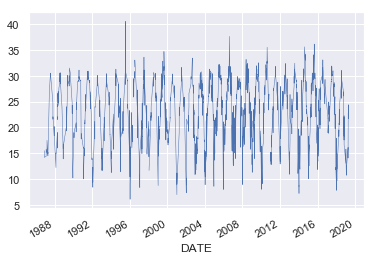

In [6]:
NBDaily['TEMP'].plot(linewidth=0.5) #lets see that beatiful temperature data...

In [7]:
if STA:
    NB_split = NBDaily[NBDaily['STA'] == STA]  #lets grab a single station
elif BAY:
    NB_split = NBDaily[NBDaily['Bay'] == BAY]  #lets grab a single station
    

In [8]:
NB_split.head()

,Est,Bay,STA,DEPTH,TEMP,SAL,DO,mondate
DATE,,,,,,,,
1987-01-29,GE,LS,C,1.0,14.5,3.0,NaN,1/15/1987
1987-03-04,GE,LS,C,2.0,16.0,6.9,NaN,3/15/1987
1987-04-10,GE,LS,C,2.0,14.5,9.2,NaN,4/15/1987
1987-06-03,GE,LS,C,2.0,26.5,3.6,NaN,6/15/1987
1987-07-15,GE,LS,C,2.0,30.5,1.1,NaN,7/15/1987


In [9]:
#resample the data to stitch together the missing days as NaN values
NB_split = NB_split.resample('D').mean()  # need to take the means as there are observations on the same day in the set.
NB_split.head() #see what it looks like now..

,DEPTH,TEMP,SAL,DO
DATE,,,,
1987-01-29,1.0,14.5,3.0,NaN
1987-01-30,NaN,NaN,NaN,NaN
1987-01-31,NaN,NaN,NaN,NaN
1987-02-01,NaN,NaN,NaN,NaN
1987-02-02,NaN,NaN,NaN,NaN


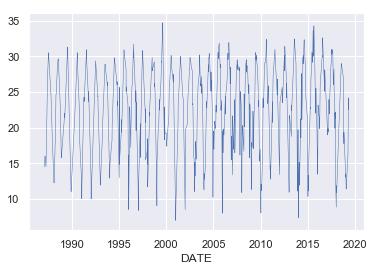

In [10]:
#Now we will interpolate those missing values.  
#If the graph yeilds really funky results, like negatives, then try different methods.
# eg. spline, polynomial, piecewise_polynomial, krogh
# see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html

method = 'piecewise_polynomial'
temp_series = NB_split['TEMP'].interpolate(method=method)
temp_series.plot(linewidth=0.5)

In [11]:
temp_series.to_csv(outputfile, header=True)